In [ ]:
#importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np


from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout,BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#loading and scaling the data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

X_train = X_train/255.0

X_test = X_test/255.0

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#creating the model
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (32,32,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 4
model.add(Conv2D(filters=256,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(filters=256,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.2))


model.add(Dense(units=10, activation="softmax"))

#model compile
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["sparse_categorical_accuracy"])



#early stopping
early_stopping = EarlyStopping(monitor="val_loss", mode = "min", verbose=1, patience= 3)

In [ ]:
#sumamary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [ ]:
#ftting the model
model.fit(X_train, y_train, validation_split=0.3, epochs= 30, batch_size=32, callbacks = [early_stopping])

Epoch 1/30
1094/1094 [==============================] - 10s 9ms/step - loss: 1.5282 - sparse_categorical_accuracy: 0.4456 - val_loss: 1.8104 - val_sparse_categorical_accuracy: 0.4277
Epoch 2/30
1094/1094 [==============================] - 9s 8ms/step - loss: 1.0059 - sparse_categorical_accuracy: 0.6491 - val_loss: 1.1291 - val_sparse_categorical_accuracy: 0.6255
Epoch 3/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.7863 - sparse_categorical_accuracy: 0.7299 - val_loss: 1.0879 - val_sparse_categorical_accuracy: 0.6481
Epoch 4/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.6536 - sparse_categorical_accuracy: 0.7759 - val_loss: 0.7881 - val_sparse_categorical_accuracy: 0.7303
Epoch 5/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.5481 - sparse_categorical_accuracy: 0.8127 - val_loss: 0.7281 - val_sparse_categorical_accuracy: 0.7570
Epoch 6/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.4523 - spar

In [ ]:
#saving the losses
loss = pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Training-Validation Accuracy')

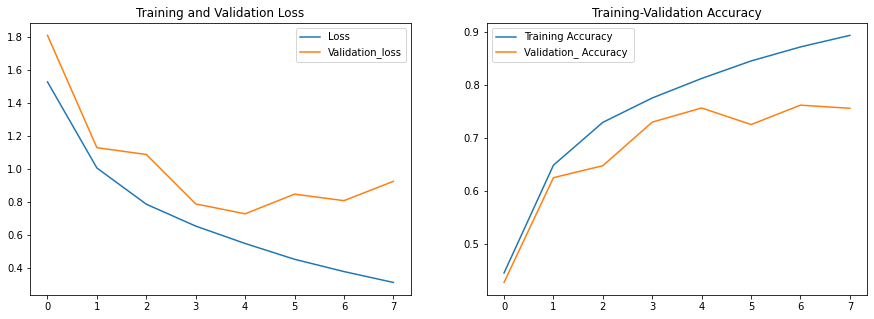

In [ ]:
#plotting the loss and accuracy
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1,2,2)
plt.plot(loss['sparse_categorical_accuracy'],label = "Training Accuracy")
plt.plot(loss['val_sparse_categorical_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [ ]:
#Creator generator
train_datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [ ]:
#fit the data 
train_datagen.fit(X_train)

In [ ]:
#creating the model
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (32,32,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 4
model.add(Conv2D(filters=256,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(filters=256,padding="same", kernel_size= (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.2))


model.add(Dense(units=10, activation="softmax"))

#model compile
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["sparse_categorical_accuracy"])


In [ ]:
#fitting the model
model.fit(train_datagen.flow(X_train, y_train, batch_size=32),
          steps_per_epoch=len(X_train) / 32, epochs=30,validation_data = (X_test,y_test))

Epoch 1/30
1563/1562 [==============================] - 30s 19ms/step - loss: 1.6237 - sparse_categorical_accuracy: 0.4025 - val_loss: 2.9391 - val_sparse_categorical_accuracy: 0.2956
Epoch 2/30
1563/1562 [==============================] - 29s 19ms/step - loss: 1.1929 - sparse_categorical_accuracy: 0.5798 - val_loss: 1.0962 - val_sparse_categorical_accuracy: 0.6129
Epoch 3/30
1563/1562 [==============================] - 29s 19ms/step - loss: 1.0005 - sparse_categorical_accuracy: 0.6513 - val_loss: 1.1829 - val_sparse_categorical_accuracy: 0.5936
Epoch 4/30
1563/1562 [==============================] - 29s 19ms/step - loss: 0.8869 - sparse_categorical_accuracy: 0.6946 - val_loss: 1.0387 - val_sparse_categorical_accuracy: 0.6554
Epoch 5/30
1563/1562 [==============================] - 29s 19ms/step - loss: 0.8005 - sparse_categorical_accuracy: 0.7266 - val_loss: 0.8719 - val_sparse_categorical_accuracy: 0.7048
Epoch 6/30
1563/1562 [==============================] - 29s 19ms/step - loss: 0.

In [ ]:
#loss
loss=pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Training-Validation Accuracy')

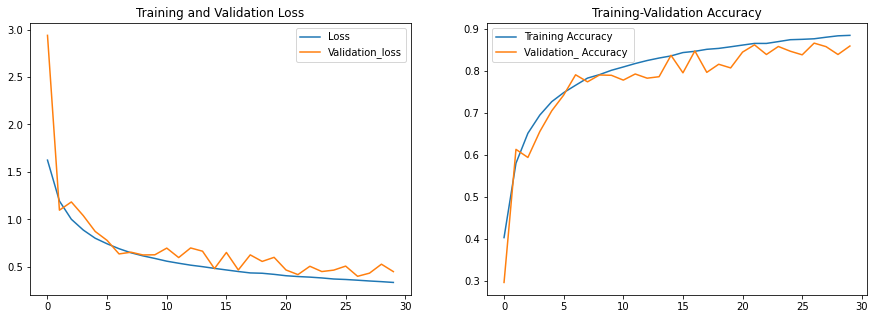

In [ ]:
#plotting the loss and accuracy
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1,2,2)
plt.plot(loss['sparse_categorical_accuracy'],label = "Training Accuracy")
plt.plot(loss['val_sparse_categorical_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")